In [1]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

### View Images

<Figure size 432x288 with 0 Axes>

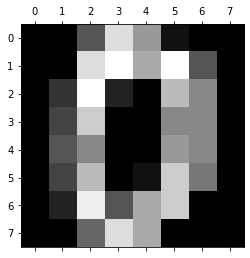

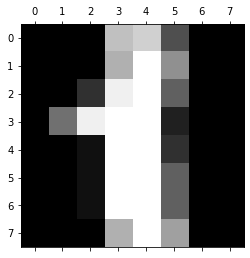

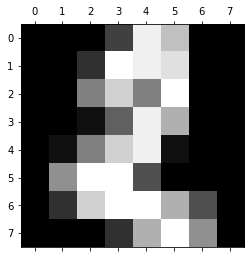

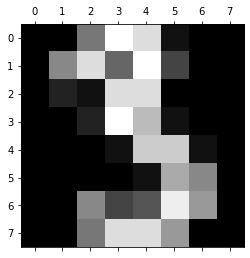

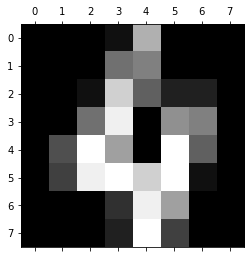

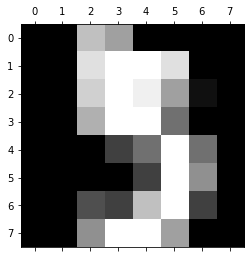

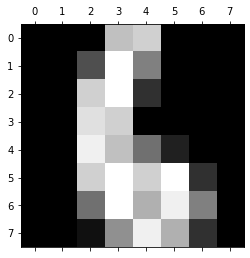

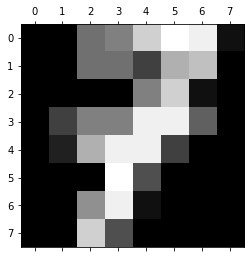

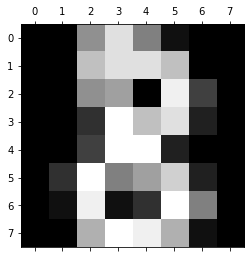

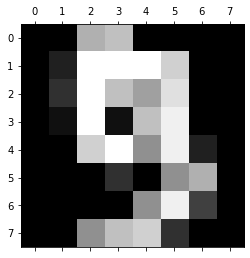

In [10]:
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### Create and Train Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)
print(X_train.shape)

(1437, 64)


In [24]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Measure Accuracy of the Model

In [25]:
model.score(X_test, y_test)

0.9555555555555556

In [26]:
model.predict(digits.data[0:10])

array([0, 1, 2, 3, 4, 9, 6, 7, 8, 9])

In [31]:
digits.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

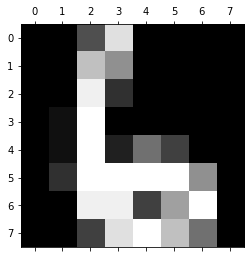

In [27]:
plt.matshow(digits.images[67])

In [28]:
digits.target[67]

6

In [30]:
model.predict([digits.data[67]])

array([6])

### Confusion Matrix

In [32]:
y_hat = model.predict(X_test)
from sklearn.metrics import confusion_matrix

In [34]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 29,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 39,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  1,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  1,  0,  0,  1,  1,  0,  0, 31,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 37]], dtype=int64)

Text(87.0, 0.5, 'Truth')

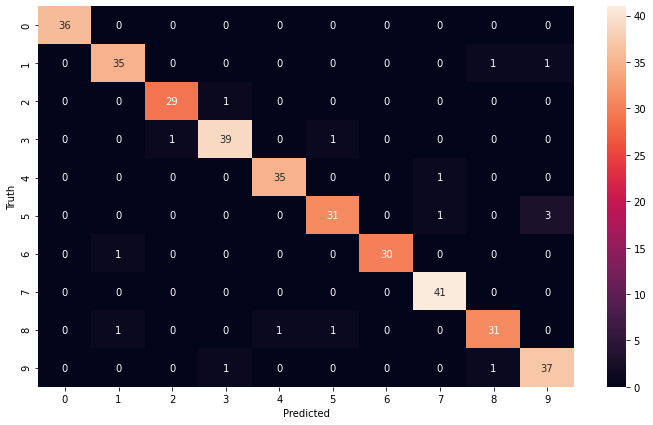

In [37]:
import seaborn as sn
plt.figure(figsize=(12,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')